In [235]:
import numpy as np
import matplotlib.pyplot as plt

In [236]:
def plot_epoch(weights, inputs, targets):
    range_x = np.linspace(-0.5, 2)
    fig, ax = plt.subplots()

    if weights.shape[0] == 2:
        w_plot = weights / weights[1]
        ax.plot(np.array([-1 * w_plot[0]] * len(range_x)), range_x)
    else:
        w_plot = weights / weights[2]
        ax.plot(range_x, range_x * (-1 * w_plot[1]) + (-1 * w_plot[0]))

    for coord, target in zip(inputs, targets):
        color = 'ro'
        if target == 0:
            color = 'bo'

        if weights.shape[0] == 2:
            ax.plot(coord[1], 0, color)
        else:
            ax.plot(coord[1], coord[2], color)
    plt.show()

In [237]:
def model(x, y):
    x = np.insert(x, 0, np.full(x.shape[0], 1, dtype=int), 1)
    # w = np.full(x.shape[1], 1, dtype=int)
    w = np.random.rand(x.shape[1])
    converged = False
    epoch = 0
    while not converged:
        epoch += 1
        converged = True
        for i in range(0, x.shape[0]):
            yhat = 0
            if np.dot(w, x[i]) > 0:
                yhat = 1
            if y[i] != yhat:
                converged = False
                if y[i] == 0 and yhat == 1:
                    w = w - x[i]
                else:
                    w = w + x[i]
        print("epoch:", epoch)
        plot_epoch(w, x, y)
    return w

AND
epoch: 1


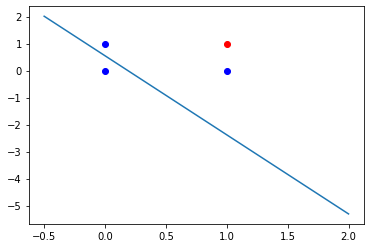

epoch: 2


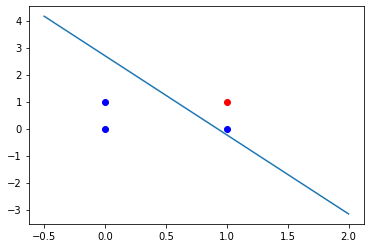

epoch: 3


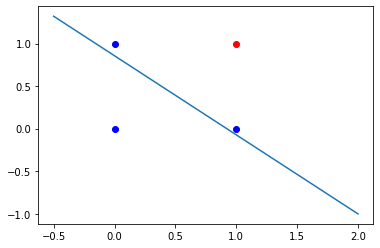

epoch: 4


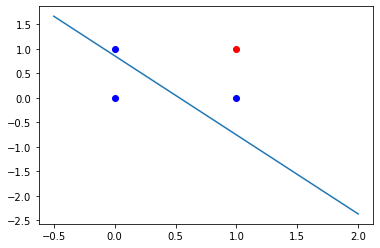

epoch: 5


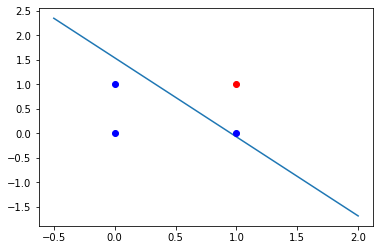

epoch: 6


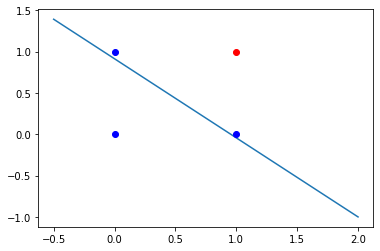

epoch: 7


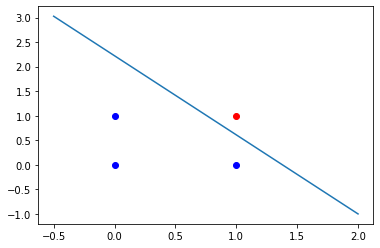

epoch: 8


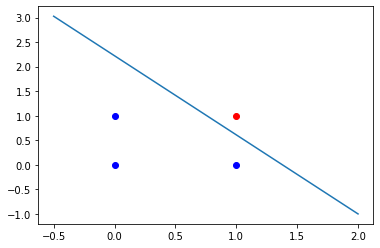

Weights for AND are [-3.25438902  2.36113285  1.46484965]
OR
epoch: 1


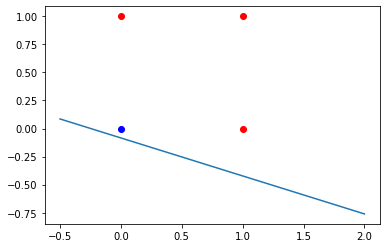

epoch: 2


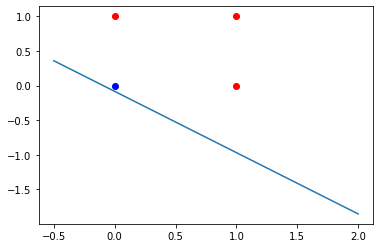

epoch: 3


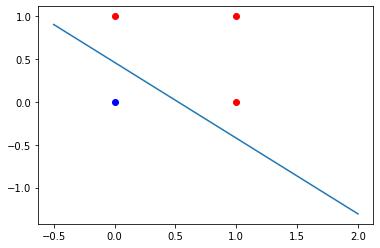

epoch: 4


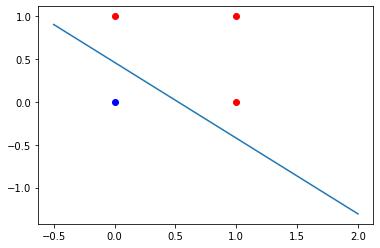

Weights for AND are [-0.84597772  1.61969539  1.83181192]
NOT
epoch: 1


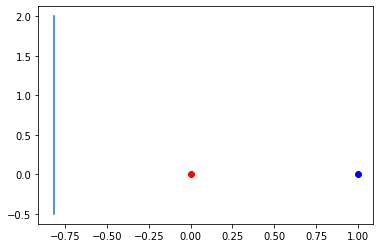

epoch: 2


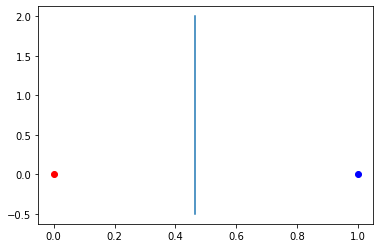

epoch: 3


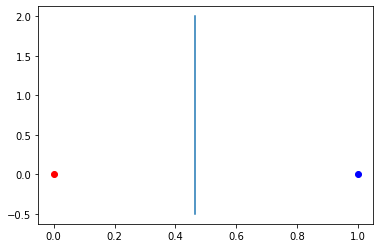

Weights for AND are [ 0.36205403 -0.78027086]
NAND
epoch: 1


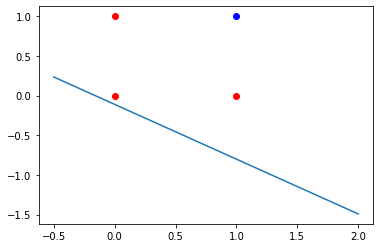

epoch: 2


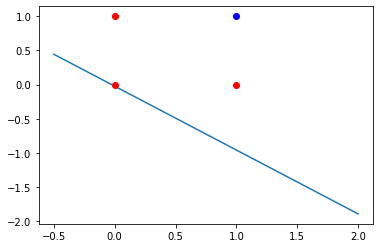

epoch: 3


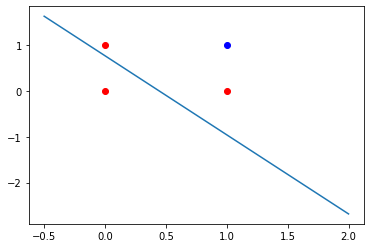

epoch: 4


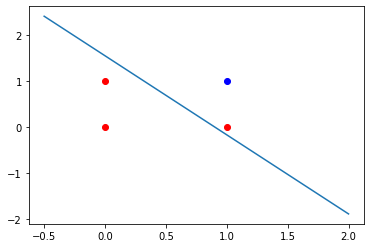

epoch: 5


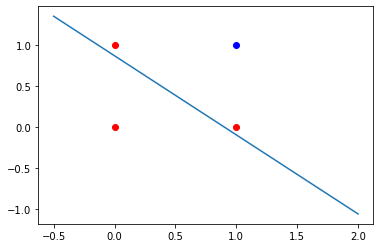

epoch: 6


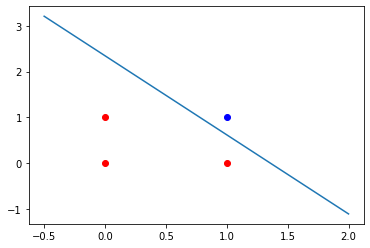

epoch: 7


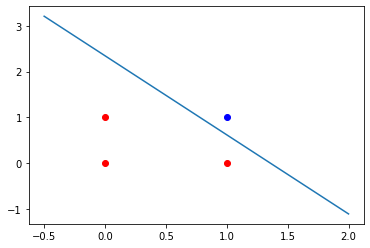

Weights for AND are [ 2.97036264 -2.18440945 -1.26711678]


In [238]:
print("AND")
weights = model(np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), np.array([0, 0, 0, 1]))
print("Weights for AND are", weights)

print("OR")
weights = model(np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), np.array([0, 1, 1, 1]))
print("Weights for AND are", weights)

print("NOT")
weights = model(np.array([[0], [1]]), np.array([1, 0]))
print("Weights for AND are", weights)

print("NAND")
weights = model(np.array([[0, 0], [0, 1], [1, 0], [1, 1]]), np.array([1, 1, 1, 0]))
print("Weights for AND are", weights)